# Southern California Data Science & Datapreneurship Roundtable

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 
from jupyterthemes import jtplot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score 

## Get the Data 

In [2]:
train_df = pd.read_csv("../data/california_housing_train.csv")
test_df = pd.read_csv("../data/california_housing_test.csv") 

print(train_df.head())
print(test_df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.05     37.37                27.0       3885.0           661.0   
1    -118.30     34.2

## Merge Data Together 

In [3]:
df = pd.concat([train_df, test_df], ignore_index = True)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


Find any rows where total number of bedrooms contains missing data 

In [7]:
df[df['total_bedrooms'].isnull()]
df.loc[290]

longitude               -116.7600
latitude                  32.8400
housing_median_age        16.0000
total_rooms             3311.0000
total_bedrooms           702.0000
population              1627.0000
households               624.0000
median_income              3.1196
median_house_value    187200.0000
Name: 290, dtype: float64

## Plot Distributions of Housing Dataset Columns 

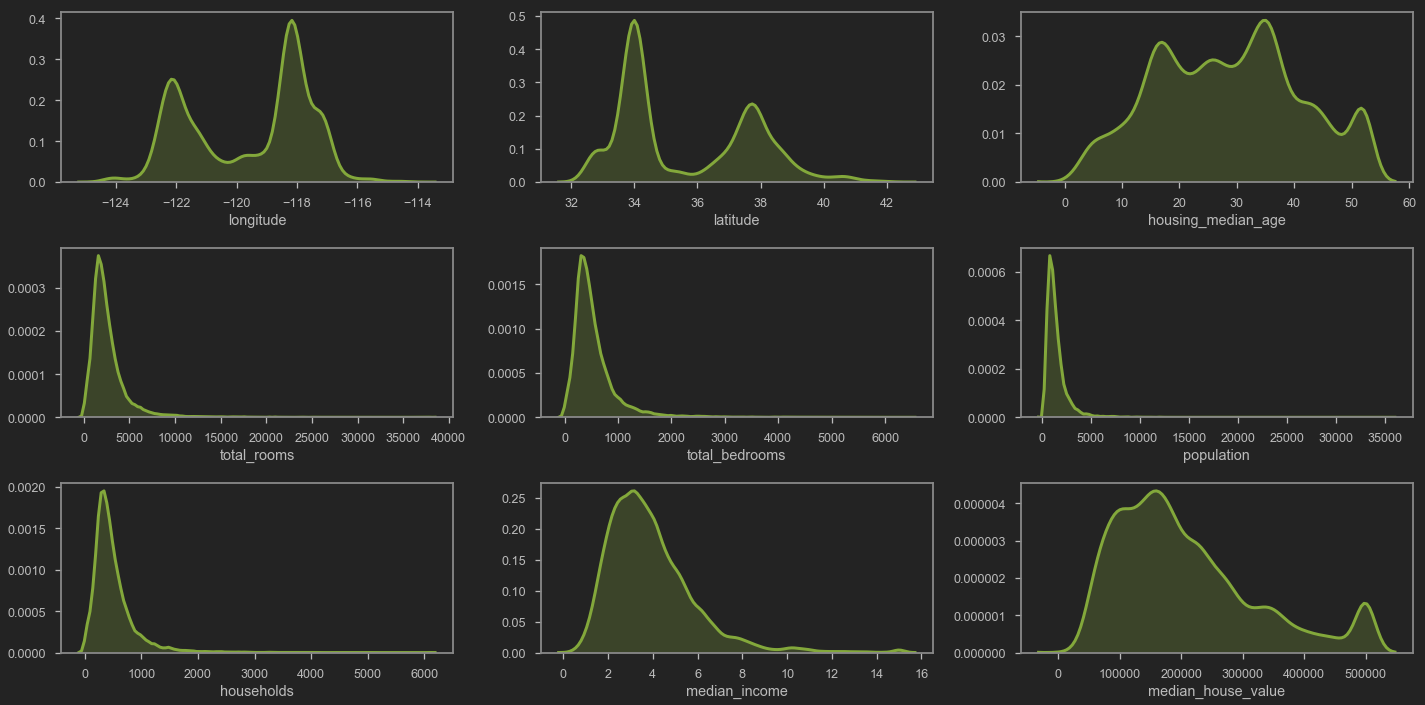

In [34]:
jtplot.style(theme='monokai', grid=False, context='talk', ticks=True) 

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,10))
for i, column in enumerate(df.columns):
    sns.distplot(df[column], ax=axes[i//3, i%3], hist=False, kde_kws={"shade":True,"color":"g", "lw":3}, 
                hist_kws={'color':"b"}) 
    plt.tight_layout() 
plt.savefig("../images/dist_matrix_plot_hist_hidden.png")
    

## Feature Engineering 

In [35]:
# Average number of rooms
df['avg_rooms'] = df['total_rooms'] / df['households'] 
df['avg_bedrooms'] = df['total_bedrooms'] / df['households']
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,avg_rooms,avg_bedrooms
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,11.889831,2.718220
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,16.522678,4.105832
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,6.153846,1.487179
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,6.641593,1.491150
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,5.549618,1.244275


In [36]:
# average population per household
df['pop_household'] = df['population'] / df['households'] 

## Assessing Multicollinearity 

In [37]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,avg_rooms,avg_bedrooms,pop_household
longitude,1.000000,-0.925176,-0.106824,0.047466,0.071700,0.102994,0.058443,-0.015882,-0.045788,-0.028833,0.012653,0.027147
latitude,-0.925176,1.000000,0.010260,-0.038911,-0.069217,-0.112025,-0.073960,-0.079157,-0.143969,0.107803,0.070822,-0.028190
housing_median_age,-0.106824,0.010260,1.000000,-0.362034,-0.320873,-0.296285,-0.303109,-0.120161,0.104470,-0.152413,-0.077748,0.010882
total_rooms,0.047466,-0.038911,-0.362034,1.000000,0.929778,0.856826,0.918234,0.199207,0.135298,0.132988,0.029525,-0.037367
total_bedrooms,0.071700,-0.069217,-0.320873,0.929778,1.000000,0.877377,0.979395,-0.007952,0.051111,0.001217,0.046045,-0.045469
population,0.102994,-0.112025,-0.296285,0.856826,0.877377,1.000000,0.907291,0.003884,-0.024234,-0.072734,-0.066796,0.083988
households,0.058443,-0.073960,-0.303109,0.918234,0.979395,0.907291,1.000000,0.013535,0.066573,-0.081114,-0.055580,-0.042214
median_income,-0.015882,-0.079157,-0.120161,0.199207,-0.007952,0.003884,0.013535,1.000000,0.689109,0.323393,-0.061824,-0.007534
median_house_value,-0.045788,-0.143969,0.104470,0.135298,0.051111,-0.024234,0.066573,0.689109,1.000000,0.150485,-0.046682,-0.043154
avg_rooms,-0.028833,0.107803,-0.152413,0.132988,0.001217,-0.072734,-0.081114,0.323393,0.150485,1.000000,0.850680,0.001947


In [45]:
# total rooms has high correlation with multiple variables
# total bedrooms has high correlation with multiple variables
# households has high correlation with multiple variables 
## remove these 3 features 

X = df.drop(['total_rooms', 'total_bedrooms', 'households'], axis=1)
Y = df['median_house_value'] 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state = 42)
reg = LinearRegression()
reg.fit(np.array(X_train), Y_train)

predictions = reg.predict(X_test) 

# Add predictions and Y_test  to a new dataframe 

compare_dict = {'y_test': Y_test, 'predictions': predictions}
compare_df = pd.DataFrame.from_dict(compare_dict) 
print(compare_df.head())

mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)
print(f"The root mean squared error is {rmse}")

r2 = r2_score(Y_test, predictions)
print(f"The r_squared percentage is {r2*100}%") 

print(reg.coef_)
print(reg.intercept_)

         y_test  predictions
10650   71900.0      71900.0
2041   186900.0     186900.0
8668   311000.0     311000.0
1114   120800.0     120800.0
13902  358800.0     358800.0
The root mean squared error is 1.4822104104789756e-10
The r_squared percentage is 100.0%
[-9.80888773e-11 -9.90340580e-11  5.73328117e-13  8.98485850e-16
  2.24533492e-11  1.00000000e+00  9.98416797e-13 -6.91880452e-12
  5.35701677e-14]
-8.381903171539307e-09


In [51]:
from IPython.display import display, Markdown 

display(Markdown("The best linear model is: $$\hat{y} =" + f"{reg.coef_[8]}x_8 + {reg.coef_[7]}x_7 + {reg.coef_[6]}x_6 + {reg.coef_[5]}x_5 + {reg.coef_[4]}x_4 + {reg.coef_[3]}x_3 + {reg.coef_[2]}x_2 + {reg.coef_[1]}x_1 + {reg.coef_[0]}x_0 + {reg.intercept_} $$"))

The best linear model is: $$\hat{y} =5.357016767305705e-14x_8 + -6.918804524226077e-12x_7 + 9.984167969905542e-13x_6 + 1.0000000000000004x_5 + 2.2453349181995776e-11x_4 + 8.984858495809712e-16x_3 + 5.733281171563042e-13x_2 + -9.903405802485041e-11x_1 + -9.808887730764835e-11x_0 + -8.381903171539307e-09 $$